# [IBM Watson : Guide to Sample Data Sets](https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/)

# data set from [kaggle.com](https://kaggle.com)
*  [120 years of Olympic history: athletes and results](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/kernels?sortBy=hotness&group=everyone&pageSize=20&datasetId=31029&language=Python)
    * [My First Kernel: 120 Years of Olympic History : matplotlib and seaborn](https://www.kaggle.com/hidede/my-first-kernel-120-years-of-olympic-history)
    * [https://www.kaggle.com/goldendime/advanced-techniques-for-dealing-w-missing-data : groupby and matplotlib](https://www.kaggle.com/goldendime/advanced-techniques-for-dealing-w-missing-data)
    * [Analysing the Olympics (for last 120 yrs.) : plotly](https://www.kaggle.com/duttadebadri/analysing-the-olympics-for-last-120-yrs)
    

* [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn)
* [Historical data on avocado prices and sales volume in multiple US markets](https://www.kaggle.com/neuromusic/avocado-prices)
    * [Predicting prices of avocados : fProphet](https://www.kaggle.com/samuelbelko/predicting-prices-of-avocados)
    * [Avocado Prices Across Regions and Seasons](https://www.kaggle.com/neuromusic/avocado-prices-across-regions-and-seasons)



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
import sys # for printing without newline or space
import os


In [2]:
df=pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
print(df.columns)
print(df.shape)
###print(df.dtypes)
print(df.info())

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')
(271116, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None


In [4]:
def print_unique(dataframe):
    notFullNull=[]
    for col in dataframe.select_dtypes([np.object]):
        if (len(dataframe[col].unique()))<10:
            print(col, ': unique=', dataframe[col].unique(), ', null=', dataframe[col].isnull().sum())
        else:
            print(col, ': unique=', len(dataframe[col].unique()), ', null=', dataframe[col].isnull().sum())
        if (dataframe[col].isnull().sum()<dataframe.shape[0]):
            notFullNull.append(col)
    return notFullNull

In [5]:
print_unique(df)

Name : unique= 134732 , null= 0
Sex : unique= ['M' 'F'] , null= 0
Team : unique= 1184 , null= 0
NOC : unique= 230 , null= 0
Games : unique= 51 , null= 0
Season : unique= ['Summer' 'Winter'] , null= 0
City : unique= 42 , null= 0
Sport : unique= 66 , null= 0
Event : unique= 765 , null= 0
Medal : unique= [nan 'Gold' 'Bronze' 'Silver'] , null= 231333


['Name',
 'Sex',
 'Team',
 'NOC',
 'Games',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

In [6]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [7]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [8]:
data = df

In [9]:
print("There are",len(data.columns),"columns:")
for x in data.columns:
    sys.stdout.write(str(x)+", ")

There are 15 columns:
ID, Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal, 

In [10]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [11]:
print("Female:",len(data[data.Sex == "F"]))
print("Male:",len(data[data.Sex == "M"]))

Female: 74522
Male: 196594


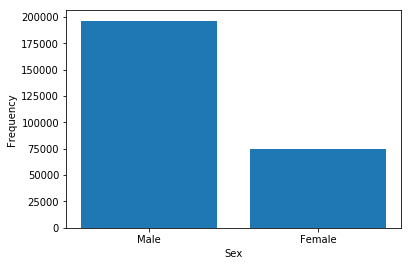

In [12]:
y = np.array([len(data[data.Sex == "M"]),len(data[data.Sex == "F"])])
x = ["Male","Female"]

plt.bar(x,y)
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.show()

In [13]:
print("The youngest athlete:",data.Age.min())
print("The average age of athletes:",data.Age.mean())
print("The oldest athlete:",data.Age.max())


The youngest athlete: 10.0
The average age of athletes: 25.556898357297374
The oldest athlete: 97.0


In [23]:
data[data['Age'].isin(data.Age.nsmallest(10))]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
43468,22411,Magdalena Cecilia Colledge,F,11.0,152.0,NaN,Great Britain,GBR,1932 Winter,1932,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,NaN
73461,37333,Carlos Bienvenido Front Barrera,M,11.0,NaN,NaN,Spain,ESP,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Eights,NaN
79024,40129,Luigina Giavotti,F,11.0,NaN,NaN,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,Silver
94058,47618,"Sonja Henie (-Topping, -Gardiner, -Onstad)",F,11.0,155.0,45.0,Norway,NOR,1924 Winter,1924,Winter,Chamonix,Figure Skating,Figure Skating Women's Singles,NaN
101378,51268,Beatrice Hutiu,F,11.0,151.0,38.0,Romania,ROU,1968 Winter,1968,Winter,Grenoble,Figure Skating,Figure Skating Women's Singles,NaN
102916,52070,Etsuko Inada,F,11.0,NaN,NaN,Japan,JPN,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Figure Skating,Figure Skating Women's Singles,NaN
140650,70616,Liu Luyang,F,11.0,NaN,NaN,China,CHN,1988 Winter,1988,Winter,Calgary,Figure Skating,Figure Skating Mixed Ice Dancing,NaN
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze
152798,76675,Marcelle Matthews,F,11.0,NaN,NaN,South Africa,RSA,1960 Winter,1960,Winter,Squaw Valley,Figure Skating,Figure Skating Mixed Pairs,NaN
237141,118925,Megan Olwen Devenish Taylor (-Mandeville-Ellis),F,11.0,157.0,NaN,Great Britain,GBR,1932 Winter,1932,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,NaN


In [27]:
kor=data['NOC']=='KOR'
df_kor=data[kor]

In [28]:
df_kor[df_kor['Age'].isin(data.Age.nsmallest(10))]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [17]:
dict(data.Age.nlargest(10))

{257054: 97.0,
 98118: 96.0,
 60861: 88.0,
 60862: 88.0,
 60863: 88.0,
 9371: 84.0,
 154855: 81.0,
 236912: 81.0,
 138812: 80.0,
 138813: 80.0}

In [14]:
whoMin=data.Age ==data.Age.min()
data[whoMin]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


In [15]:
whoMax=data.Age ==data.Age.max()
data[whoMax]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


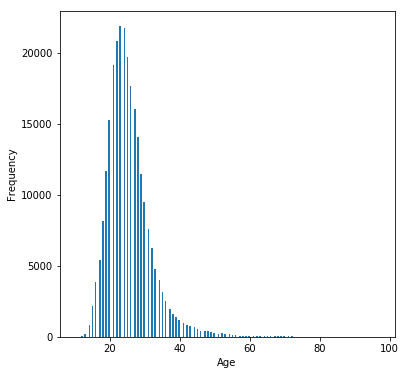

In [29]:
data["Age"].plot(kind = 'hist',bins = 200,figsize = (6,6))
#data.Age.plot(kind = 'hist',bins = 200,figsize = (6,6))
#data.plot(kind = "hist",y = "Age",bins = 200,figsize = (6,6))
#plt.hist(data[data.Age.notnull()].Age,bins= 200) # No figsize = (6,6) No NaN values

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

C:\Users\p\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


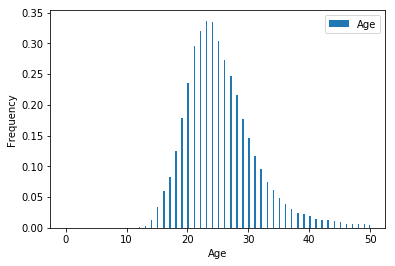

In [30]:
data.plot(kind = "hist",y = "Age",bins = 200,figsize = (6,4),range= (0,50),normed = True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

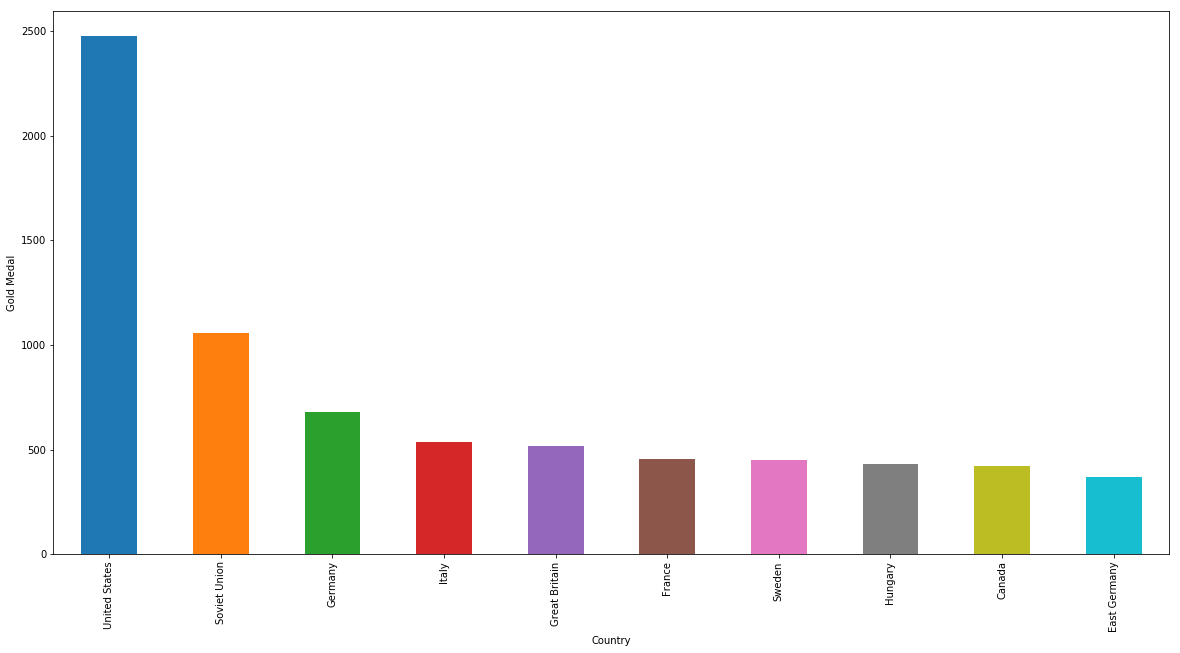

In [31]:
s = data[data.Medal == "Gold"].Team.value_counts().head(10)
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("Country")
plt.ylabel("Gold Medal")
plt.show()

In [33]:
data.Team.unique()

array(['China', 'Denmark', 'Denmark/Sweden', ..., 'Solos Carex',
       'Dow Jones', 'Digby'], dtype=object)

In [42]:
[s for s in data.Team.unique() if "Korea" in s ]

['South Korea',
 'North Korea',
 'South Korea-2',
 'North Korea-1',
 'South Korea-1',
 'North Korea-2']

In [44]:
data[data.NOC=='KOR'].shape

(4464, 15)

In [51]:
df_kor=data[data.NOC=='KOR']
df_kor.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2520,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
2521,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN
2522,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2523,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
2524,1422,Ahn Jin-Soo,M,20.0,178.0,70.0,South Korea,KOR,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN


In [53]:
##data.groupby('Games')['Games'].count() # produces Pandas Series
data.groupby('Games')[['Games']].count() # Produces Pandas DataFrame

,Games
Games,
1896 Summer,380
1900 Summer,1936
1904 Summer,1301
1906 Summer,1733
1908 Summer,3101
1912 Summer,4040
1920 Summer,4292
1924 Summer,5233
1924 Winter,460


In [59]:
df_kor.groupby('Games').agg({'Games':"count",'Age':['mean','max','min']})

Games        Age            
            count       mean   max   min
Games                                   
1948 Summer    48  27.791667  38.0  20.0
1948 Winter     7  25.285714  26.0  25.0
1952 Summer    22  26.263158  40.0  18.0
1956 Summer    36  25.736842  37.0  20.0
1956 Winter    10  25.400000  34.0  21.0
1960 Summer    49  23.775510  35.0  17.0
1960 Winter    20  20.416667  26.0  18.0
1964 Summer   240  23.412500  48.0  16.0
1964 Winter    16  23.250000  30.0  17.0
1968 Summer    66  23.531250  34.0  18.0
1968 Winter    14  21.071429  25.0  14.0
1972 Summer    43  23.860465  48.0  17.0
1972 Winter    11  18.636364  22.0  13.0
1976 Summer    51  24.470588  45.0  18.0
1976 Winter     9  16.444444  19.0  14.0
1980 Winter    24  19.791667  24.0  17.0
1984 Summer   240  21.537500  39.0  15.0
1984 Winter    38  20.631579  27.0  17.0
1988 Summer   551  21.671506  35.0  14.0
1988 Winter    56  20.714286  25.0  15.0
1992 Summer   322  21.763975  36.0  15.0
1992 Winter    57  20.122807  26.0  15.0
1994 Winter    45  19.644444  28.0  13.0
1996 Summer   417  22.549161  40.0  13.0
1998 Winter    79  19.784810  27.0  14.0
2000 Summer   359  24.119777  34.0  14.0
2002 Winter    87  20.425287  29.0  15.0
2004 Summer   344  24.183140  43.0  14.0
2006 Winter    85  21.564706  32.0  15.0
2008 Summer   329  24.920973  39.0  14.0
2010 Winter    84  22.500000  36.0  16.0
2012 Summer   312  25.471154  39.0  14.0
2014 Winter   130  23.569231  35.0  16.0
2016 Summer   263  25.646388  43.0  17.0

In [66]:
df_kor.groupby(['Games','Sex']).agg({'Games':"count",'Age':['mean','max','min'],'Medal':"count"}).round()

Games   Age             Medal
                count  mean   max   min count
Games       Sex                              
1948 Summer F       1   NaN   NaN   NaN     0
            M      47  28.0  38.0  20.0     2
1948 Winter M       7  25.0  26.0  25.0     0
1952 Summer F       1  18.0  18.0  18.0     0
            M      21  27.0  40.0  20.0     2
1956 Summer M      36  26.0  37.0  20.0     2
1956 Winter M      10  25.0  34.0  21.0     0
1960 Summer F       6  18.0  20.0  17.0     0
            M      43  25.0  35.0  18.0     0
1960 Winter F       7  19.0  19.0  18.0     0
            M      13  23.0  26.0  21.0     0
1964 Summer F      44  18.0  23.0  16.0     0
            M     196  25.0  48.0  17.0     3
1964 Winter F       4  18.0  18.0  17.0     0
            M      12  25.0  30.0  21.0     0
1968 Summer F      15  20.0  23.0  18.0     0
            M      51  25.0  34.0  19.0     2
1968 Winter F       4  19.0  22.0  14.0     0
            M      10  22.0  25.0  19.0     0
1972 Summer F      10  21.0  23.0  18.0     0
            M      33  25.0  48.0  17.0     1
1972 Winter F       9  18.0  20.0  13.0     0
            M       2  22.0  22.0  22.0     0
1976 Summer F      12  22.0  26.0  20.0    12
            M      39  25.0  45.0  18.0     5
1976 Winter F       5  14.0  16.0  14.0     0
            M       4  19.0  19.0  19.0     0
1980 Winter F       9  20.0  24.0  17.0     0
            M      15  20.0  23.0  17.0     0
1984 Summer F      69  20.0  28.0  15.0    26
...               ...   ...   ...   ...   ...
1988 Winter F       8  20.0  21.0  17.0     0
            M      48  21.0  25.0  15.0     0
1992 Summer F      94  21.0  34.0  15.0    28
            M     228  22.0  36.0  16.0    21
1992 Winter F       5  19.0  25.0  15.0     0
            M      52  20.0  26.0  17.0     7
1994 Winter F      21  18.0  27.0  13.0     6
            M      24  21.0  28.0  15.0     3
1996 Summer F     145  21.0  30.0  13.0    47
            M     272  23.0  40.0  14.0    19
1998 Winter F      22  19.0  22.0  15.0     7
            M      57  20.0  27.0  14.0     5
2000 Summer F     127  23.0  33.0  14.0    14
            M     232  25.0  34.0  15.0    59
2002 Winter F      28  20.0  23.0  15.0     7
            M      59  21.0  29.0  16.0     0
2004 Summer F     141  23.0  43.0  15.0    30
            M     203  25.0  35.0  14.0    22
2006 Winter F      30  19.0  26.0  15.0     8
            M      55  23.0  32.0  19.0    11
2008 Summer F     121  24.0  35.0  14.0    31
            M     208  25.0  39.0  18.0    47
2010 Winter F      35  21.0  28.0  16.0     5
            M      49  24.0  36.0  18.0    13
2012 Summer F     136  25.0  36.0  14.0    15
            M     176  26.0  39.0  17.0    46
2014 Winter F      54  23.0  35.0  16.0    11
            M      76  24.0  35.0  18.0     3
2016 Summer F     118  26.0  43.0  17.0    12
            M     145  25.0  36.0  18.0    14

[65 rows x 5 columns]

In [70]:
df_kor.Medal.unique()

array([nan, 'Silver', 'Gold', 'Bronze'], dtype=object)

In [84]:
df_kor['Gold']=df_kor['Medal'].apply(lambda x : 1 if x=='Gold' else 0)
df_kor['Silver']=df_kor['Medal'].apply(lambda x : 1 if x=='Silver' else 0)
df_kor['Bronze']=df_kor['Medal'].apply(lambda x : 1 if x=='Bronze' else 0)
df_kor.head()

C:\Users\p\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\p\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\p\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Gold,Silver,Bronze
2520,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,0,0,0
2521,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN,0,0,0
2522,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,0,0,0
2523,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,0,0,0
2524,1422,Ahn Jin-Soo,M,20.0,178.0,70.0,South Korea,KOR,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,0,0,0


In [85]:
data.loc[:10, "Name":"Age"]

,Name,Sex,Age
0,A Dijiang,M,24.0
1,A Lamusi,M,23.0
2,Gunnar Nielsen Aaby,M,24.0
3,Edgar Lindenau Aabye,M,34.0
4,Christine Jacoba Aaftink,F,21.0
5,Christine Jacoba Aaftink,F,21.0
6,Christine Jacoba Aaftink,F,25.0
7,Christine Jacoba Aaftink,F,25.0
8,Christine Jacoba Aaftink,F,27.0
9,Christine Jacoba Aaftink,F,27.0


In [86]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [88]:
filtre2 = (data.Age >70) & (data["Medal"] == "Silver")
print(type(filtre2))
print(type(data[filtre2]))
data[filtre2]

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
44584,22984,John (Herbert Crawford-) Copley (Williamson-),M,73.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",Silver
150755,75648,Charles William Martin,M,71.0,NaN,NaN,Crabe II-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,Silver
233395,117046,Oscar Gomer Swahn,M,72.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Double Shot, Team",Silver


In [89]:
events=df

In [90]:
events.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [94]:
print(len(events['Sport'].unique()))
events['Sport'].unique()

66


array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [95]:
events['Medal'].value_counts(dropna=False)

NaN       231333
Gold       13372
Bronze     13295
Silver     13116
Name: Medal, dtype: int64

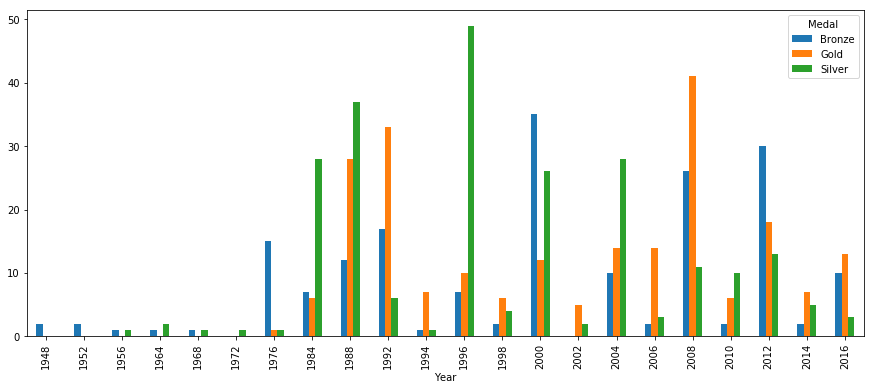

In [97]:
df_kor.groupby(['Year', 'Medal'])['Medal'].count().unstack().plot(kind='bar',figsize=(15,6))

In [98]:
df_kor.groupby(['Year','Medal'])['Medal'].count()

Year  Medal 
1948  Bronze     2
1952  Bronze     2
1956  Bronze     1
      Silver     1
1964  Bronze     1
      Silver     2
1968  Bronze     1
      Silver     1
1972  Silver     1
1976  Bronze    15
      Gold       1
      Silver     1
1984  Bronze     7
      Gold       6
      Silver    28
1988  Bronze    12
      Gold      28
      Silver    37
1992  Bronze    17
      Gold      33
      Silver     6
1994  Bronze     1
      Gold       7
      Silver     1
1996  Bronze     7
      Gold      10
      Silver    49
1998  Bronze     2
      Gold       6
      Silver     4
2000  Bronze    35
      Gold      12
      Silver    26
2002  Gold       5
      Silver     2
2004  Bronze    10
      Gold      14
      Silver    28
2006  Bronze     2
      Gold      14
      Silver     3
2008  Bronze    26
      Gold      41
      Silver    11
2010  Bronze     2
      Gold       6
      Silver    10
2012  Bronze    30
      Gold      18
      Silver    13
2014  Bronze     2
      Gold       7

In [100]:
df_kor.groupby(['Year','Medal'])['Medal'].count().unstack().head()

Medal,Bronze,Gold,Silver
Year,,,
1948,2.0,NaN,NaN
1952,2.0,NaN,NaN
1956,1.0,NaN,1.0
1964,1.0,NaN,2.0
1968,1.0,NaN,1.0


In [101]:
events.groupby('Year')[['Height','Weight','Age','Team','Games']].count()

,Height,Weight,Age,Team,Games
Year,,,,,
1896,46,49,217,380,380
1900,116,79,1146,1936,1936
1904,213,147,1027,1301,1301
1906,257,205,990,1733,1733
1908,475,483,2452,3101,3101
1912,721,596,3884,4040,4040
1920,767,471,3447,4292,4292
1924,974,690,4551,5693,5693
1928,975,718,4611,5574,5574
